# The Second Part of the Assignment of IDS 2020-2021
In this Jupyter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

It is not needed that the group members be the same as the group members of the first part of the assignment, <font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student's matriculation number is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the datasets. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and matriculation numbers:
    
    1. Hyeon Su Gim (403364)
   
    2. Zhipeng Tan (391683)
    
    3.

## Question 1 - Data Preprocessing and Data Quality (15 points)

(a) Carry out the following preprocessing steps before starting the analysis:

Select 90% of dataset <b>dataPrepViz.csv</b> for this assignment by random sampling. Use the matriculation number of one of the group members as seed. Rename the sampled dataset to <b>dataPrepViz_sampled</b> and export it as CSV.

 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

Use this dataset <b>dataPrepViz_sampled</b> as starting point for Question 1 and Question 2. Then apply further modifications as specified in the those questions.

In [407]:
import random
import pandas as pd
import numpy as np
import math

# Import into dataframe df
df = pd.read_csv("Datasets/DataPrepViz.csv", delimiter=";")

# Set seed with student ID of Hyeon Su Gim.
random.seed(403364)

# Generate sampled_data dataframe based on random sampling of df, based on sampling size k which is the rounded up (ceiling) of the length (shape[0]) of the original dataframe, df. 
dataPrepViz_sampled = df[df.index.isin(random.sample(range(len(df)),k=math.ceil(0.9*len(df))))]
dataPrepViz_sampled.name = 'dataPrepViz_sampled'

# Export sample_data to a csv of the same name in the same directory.
dataPrepViz_sampled.to_csv("Datasets/dataPrepViz_sampled.csv", index=False)


In [408]:
import numpy as np
import pandas as pd
dataPrepViz_sampled = pd.read_csv("Datasets/dataPrepViz_sampled.csv")
dataPrepViz_sampled

,geographic_group,country,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,co2_emissions_tonnes_per_person,corruption_perception_index_cpi,life_expectancy_years,vccin_effect_dag
0,Eastern Mediterranean,Afghanistan,-10.00,70.40,0.262,11.0,61.2,0.058
1,NaN,Albania,-10.00,9.60,1.600,36.0,78.0,NaN
2,Africa,Algeria,-10.00,24.90,3.800,36.0,77.1,0.078
3,Americas,Argentina,2.31,11.50,4.640,32.0,76.5,0.013
4,Europe,Armenia,-10.00,14.40,1.650,35.0,75.3,0.139
...,...,...,...,...,...,...,...,...
121,Americas,United States,1.93,6.80,16.900,76.0,78.8,0.096
122,Americas,Uruguay,2.01,8.85,1.940,74.0,77.0,NaN
123,NaN,Uzbekistan,2.31,25.90,3.310,19.0,69.9,NaN
124,NaN,Zambia,5.04,64.60,0.271,38.0,62.0,NaN


Create new dataset <b>data1</b> by removing the feature 'geographic_group' from <b>dataPrepViz_sampled</b>. Use this <b>data1</b> dataset for Question 1.

In [409]:
# your code
data1 = dataPrepViz_sampled.drop("geographic_group", axis=1)
data1.name = 'data1' # Useful for labeling later.

(b) We want to get a first impression of the data. To achieve this, compute and show the following:

- the column names (the names of the features)
- the data type of each feature
- for categorical features: the number of classes and the value of the most frequent class
- for numerical features: the mean, standard deviation, minimum and maximum

In [410]:
# your code
print("Column Names and Datatypes:")
print(data1.dtypes)
print()
print("Categorical Features: country")
print("Count: ", len(data1.country.unique()))
print("Mode: \n", data1.country.mode())
print("The fact that all 126 countries are presented as the mode means the each class has a frequency of 1 and hence each class is the most frequent. \n")
print("Numerical Features: ")
for i in data1.columns[1:]:
    print(data1[[i]].describe())

Column Names and Datatypes:
country                                               object
children_per_woman_total_fertility                   float64
child_mortality_0_5_year_olds_dying_per_1000_born    float64
co2_emissions_tonnes_per_person                      float64
corruption_perception_index_cpi                      float64
life_expectancy_years                                float64
vccin_effect_dag                                     float64
dtype: object

Categorical Features: country
Count:  126
Mode: 
 0        Afghanistan
1            Albania
2            Algeria
3          Argentina
4            Armenia
           ...      
121    United States
122          Uruguay
123       Uzbekistan
124           Zambia
125         Zimbabwe
Length: 126, dtype: object
The fact that all 126 countries are presented as the mode means the each class has a frequency of 1 and hence each class is the most frequent. 

Numerical Features: 
       children_per_woman_total_fertility
count         

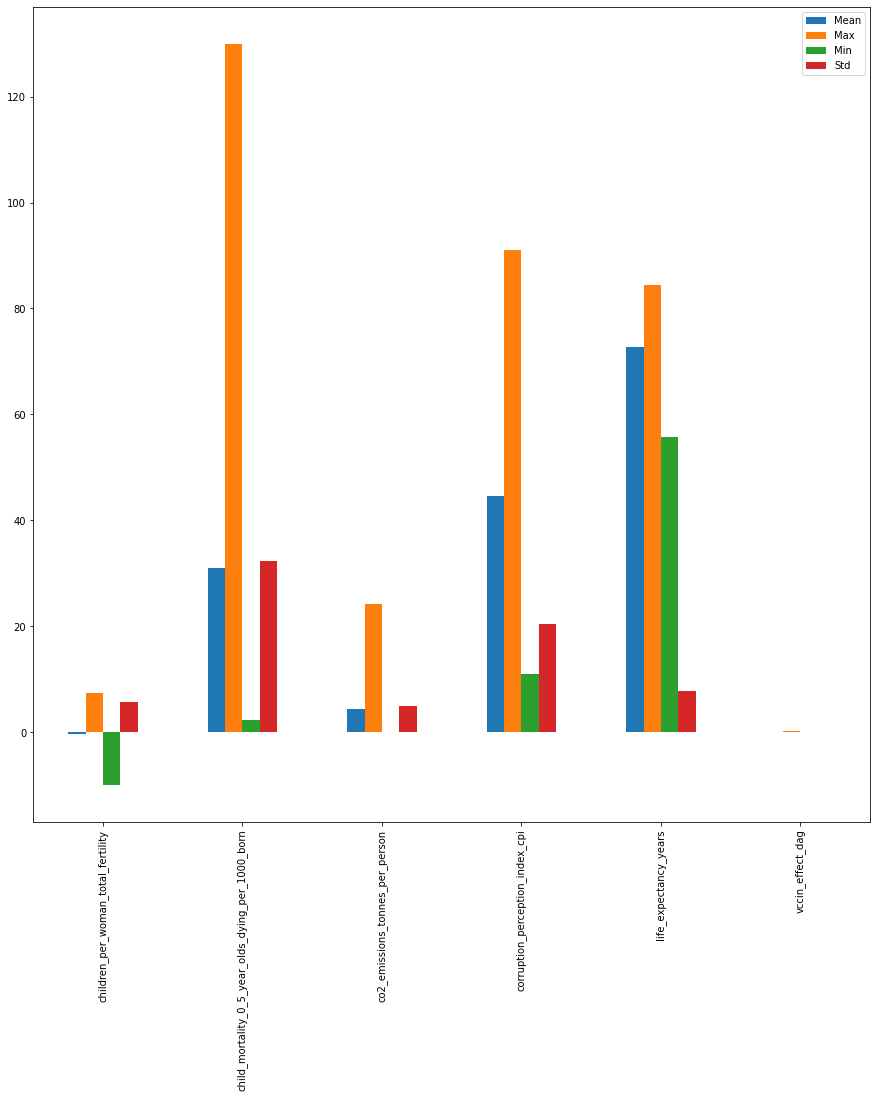

In [411]:
import matplotlib.pyplot as plt
def Plot_Features(data1):
## plot the mean, max, min, and std
    MeanArray = []
    MaxArray = []
    MinArray = []
    StdArray = []
    for label in data1.columns[1:]:
        MeanArray = MeanArray + [data1[label].mean()]
        MaxArray = MaxArray + [data1[label].max()]
        MinArray = MinArray + [data1[label].min()]
        StdArray = StdArray + [data1[label].std()]

    columns = data1.columns[1:]
    df = pd.DataFrame({'Mean': MeanArray,
                       'Max': MaxArray,
                       'Min': MinArray,
                       'Std': StdArray }, index=columns)

    df.plot.bar(figsize=[15,15],fontsize=10)
    
Plot_Features(data1)

(c) For each feature, provide a histogram (with at least 10 bins each) showing the value distribution. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

Briefly explain the issues you identified.

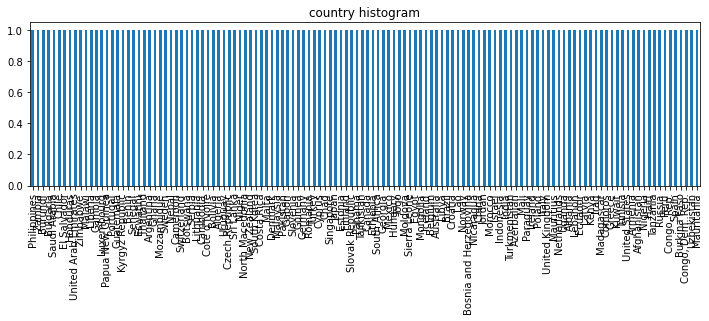

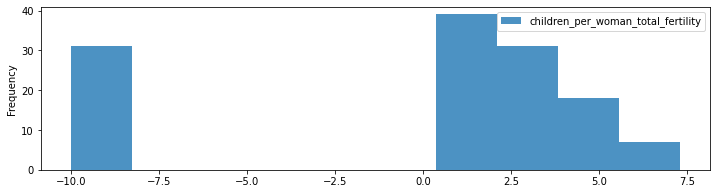

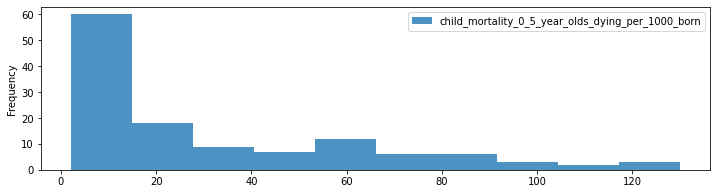

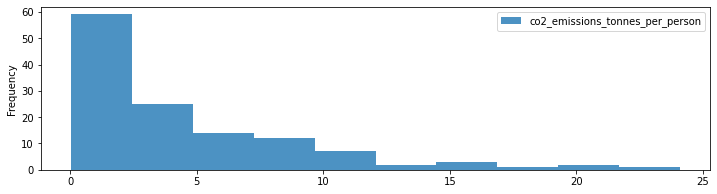

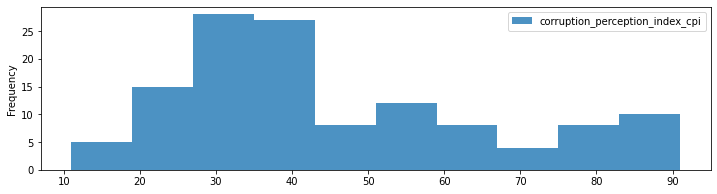

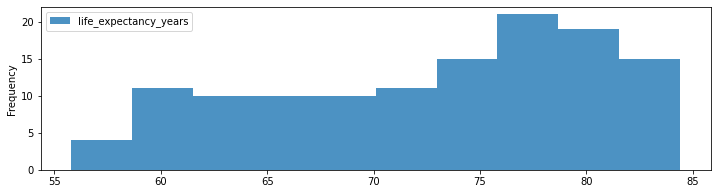

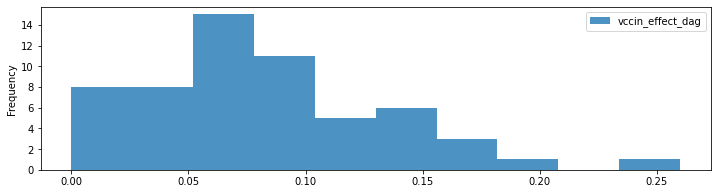

In [412]:
# your code
data1.country.value_counts().plot(kind='bar', title="country histogram", figsize=(12,3))
for col in data1.columns[1:]:
    data1[[col]].plot.hist(bins=10,alpha=0.8, figsize=(12,3))

Explanation: 
The histogram for the categorical feature country is not very useful as each country has a frequency of 1 and there are 126 of them. It is shown for completeness to answer the question.

As for children_per_woman_total_fertility, there are about 30 counts of features with values of -10, which is unreasonable. This has a high probability that the value -10 was used as a substitute for NaN.

For child_mortality_0_5_year_olds_dying_per_1000_born, there are several values which are above 100. This is not entirely implausible as the country could be undergoing a particularly violent stage for which child mortality could be more than 10% (100/1000).

For co2_emissions_tonnes_per_person, the data seems to be in order as there are no glaring exceptions. All 126 countries are accounted for.

For corruption_perception_index_cpi, there is one value missing (see part (b) for count statistics). However, the rest of the data seems to be in order.

For life_expectancy_years, data seems to be in order.

For vccin_effect_dag, there are only 58 elements, indicating more than half of the countries missing data entries. The present data, however, seems to be in order (no negative values).

(d) Substitute all implausible values as missing data (numpy.nan). Show the scatter matrix of the resulting dataset.

array([[<AxesSubplot:xlabel='children_per_woman_total_fertility', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='child_mortality_0_5_year_olds_dying_per_1000_born', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='co2_emissions_tonnes_per_person', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='corruption_perception_index_cpi', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='life_expectancy_years', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='vccin_effect_dag', ylabel='children_per_woman_total_fertility'>],
       [<AxesSubplot:xlabel='children_per_woman_total_fertility', ylabel='child_mortality_0_5_year_olds_dying_per_1000_born'>,
        <AxesSubplot:xlabel='child_mortality_0_5_year_olds_dying_per_1000_born', ylabel='child_mortality_0_5_year_olds_dying_per_1000_born'>,
        <AxesSubplot:xlabel='co2_emissions_tonnes_per_person', ylabel='child_mor

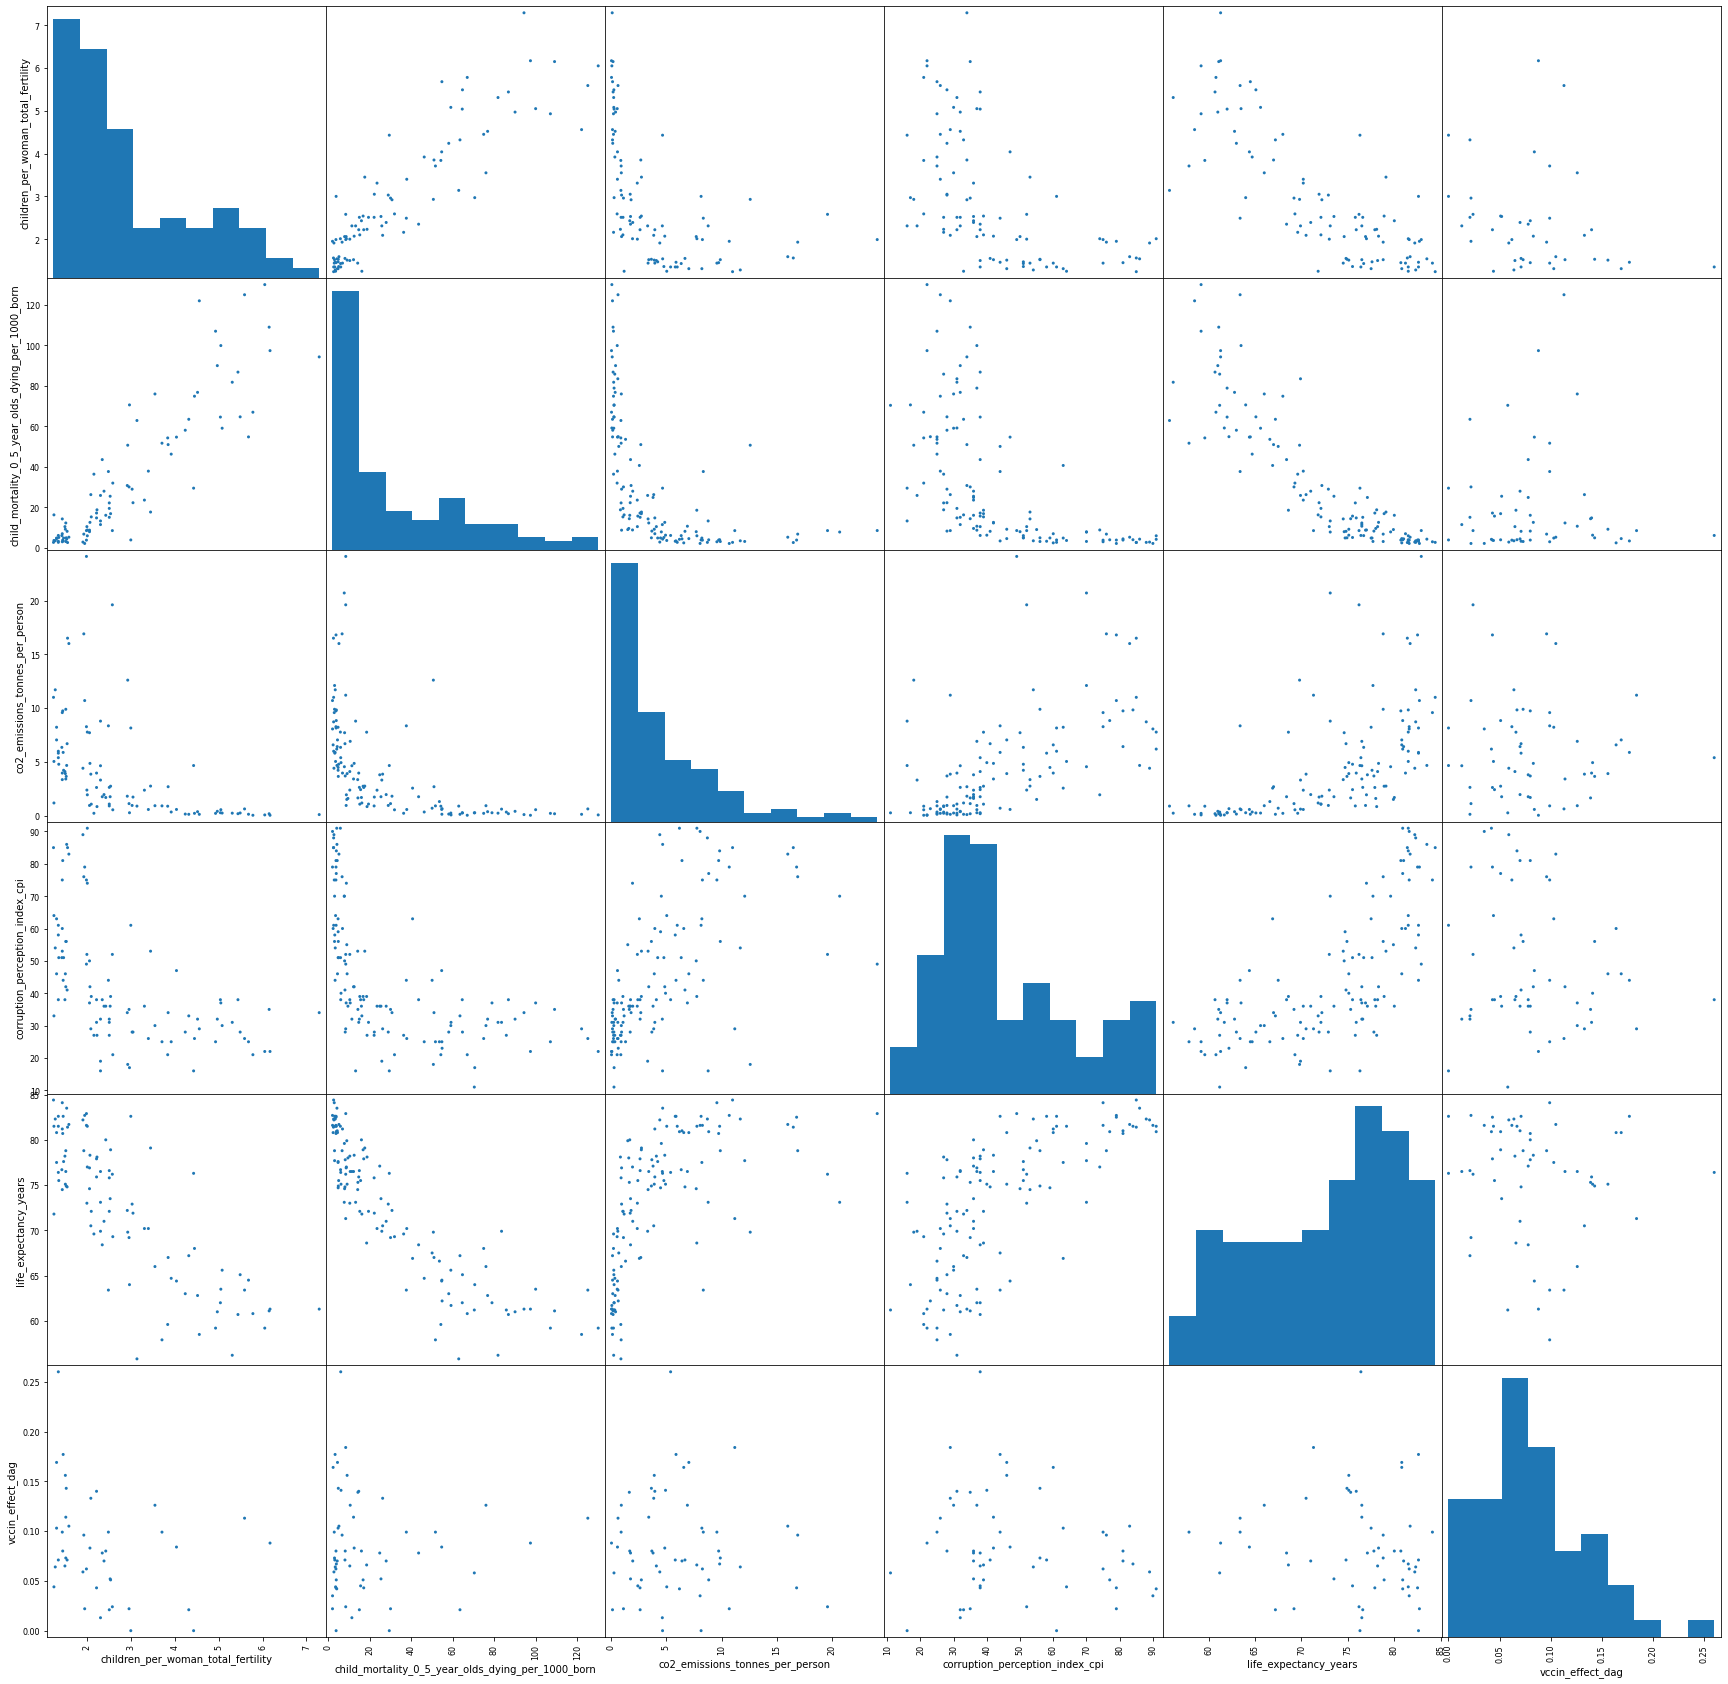

In [413]:
# your code

data1.loc[data1["children_per_woman_total_fertility"] == -10.0, "children_per_woman_total_fertility"] = np.nan
data1.isnull = np.nan
pd.plotting.scatter_matrix(data1, alpha=1.0, figsize=(30,30))

(e) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced. 

In this question, consider implausible values to be the ones identified in part (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Based on the information obtained in the previous subtasks of this question, choose a strategy for handling all missing/implausible values, such that
    - for one feature, you delete all data rows that include a missing value.
    - for one feature, you replace all missing values by the median value.
    - for one feature, you impute the values based on other, continous features using a regression classifier.
    Create a cleaned dataset with all those values handled accordingly. 
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned dataset. Also print the total number of data rows.
    
    4) Motivate and explain the choices you made in 2). Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.
 
*Hint: There might not be an obvious choice for the best strategy. In this case, sound reasoning based on correct observations is more important than the decision itself.*

In [414]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression

print("1) Mean, SD, Min, Max, Count ignoring missing and implausible values.")
for col in data1.columns[1:]:
    print(data1[[col]].describe())
#Plot_Features(data1) 
print("2) Strategy")
# Missing Values
print("Missing Values per row:")
data1_rowmissing = data1.copy()
data1_rowmissing["missing_value_count"] = data1.apply(lambda x: 7-x.count(), axis=1)
print(data1_rowmissing.sort_values("missing_value_count", ascending=False).head(20)[["country", "missing_value_count"]], "\n")
# Correlation Matrix
print("Correlation matrix: \n", data1.corr())


# Median value substitution
from sklearn.impute import SimpleImputer

# replace missing values in "corruption_perception_index_cpi" by mean values
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
data1["corruption_perception_index_cpi"] = imputer.fit_transform(data1[["corruption_perception_index_cpi"]]).ravel()
## using regression classifier to impute the 'vccin_effect_dag' values
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
data1["vccin_effect_dag"] = imputer.fit_transform(data1[["vccin_effect_dag"]])


1) Mean, SD, Min, Max, Count ignoring missing and implausible values.
       children_per_woman_total_fertility
count                           95.000000
mean                             2.883895
std                              1.484305
min                              1.240000
25%                              1.555000
50%                              2.390000
75%                              3.845000
max                              7.290000
       child_mortality_0_5_year_olds_dying_per_1000_born
count                                         126.000000
mean                                           30.985714
std                                            32.312187
min                                             2.180000
25%                                             5.992500
50%                                            15.900000
75%                                            53.125000
max                                           130.000000
       co2_emissions_tonnes_per_person


In [415]:
# Regression for fertility
from sklearn.linear_model import LinearRegression

data1_Train = data1[["children_per_woman_total_fertility", "child_mortality_0_5_year_olds_dying_per_1000_born", "life_expectancy_years"]]
data1_Train = data1_Train.dropna(axis=0,how='any')
target_feature = np.array(data1_Train["children_per_woman_total_fertility"],dtype=np.float32)
descriptive_features = np.array(data1_Train[["child_mortality_0_5_year_olds_dying_per_1000_born", "life_expectancy_years"]],dtype=np.float32)
#descriptive_features = data1_Train[["child_mortality_0_5_year_olds_dying_per_1000_born"]]

classifier = LinearRegression()
reg = classifier.fit(descriptive_features, target_feature)
nan_rows = data1['children_per_woman_total_fertility'].isna()
target_pred = classifier.predict(data1.loc[nan_rows,["child_mortality_0_5_year_olds_dying_per_1000_born", "life_expectancy_years"]])
data1.loc[nan_rows,'children_per_woman_total_fertility'] = target_pred
print("Regression Classifier score: ", reg.score(descriptive_features, target_feature))

Regression Classifier score:  0.8028237270784473


In [416]:
data1_cleared = data1
data1_cleared.head()

,country,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,co2_emissions_tonnes_per_person,corruption_perception_index_cpi,life_expectancy_years,vccin_effect_dag
0,Afghanistan,4.424311,70.4,0.262,11.0,61.2,0.0580
1,Albania,1.936388,9.6,1.600,36.0,78.0,0.0755
2,Algeria,2.499593,24.9,3.800,36.0,77.1,0.0780
3,Argentina,2.310000,11.5,4.640,32.0,76.5,0.0130
4,Armenia,2.158756,14.4,1.650,35.0,75.3,0.1390


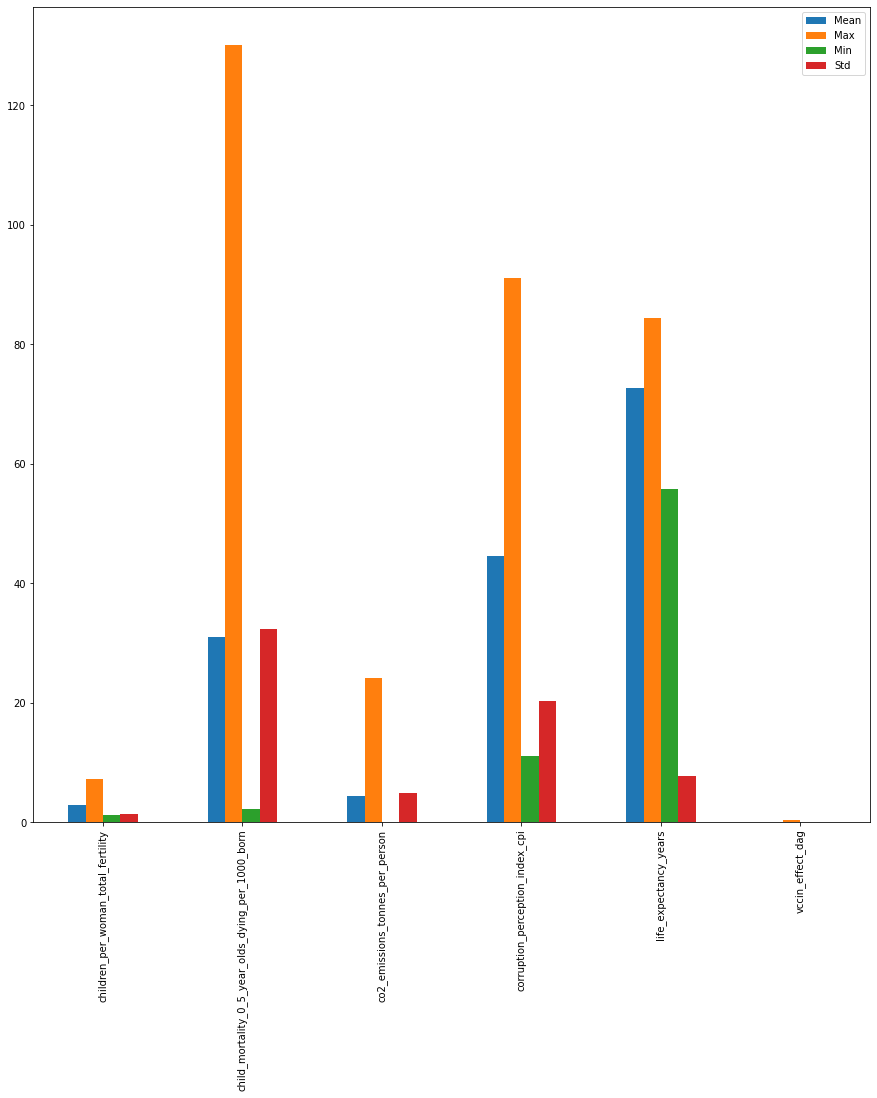

In [417]:
Plot_Features(data1_cleared)

Explanation: 

For child mortality, co2 emissions and life expectancy, there are no missing values.

Strategy 1 in this particular case does not make much sense because each row corresponds to a unique country. If the country has many missing values across multiple features, then it might be warranted. To investigate this, the top 20 countries with the most missing values in the features have been listed in the code above. As we can see, out of the 6 possible attributes, at most, 2 are missing. Since this does not constitute a majority, deleting the entry is not plausible. To negate the strategy further, only 16 countries have 2 missing entries out of 126 sampled.

Between Strategy 2 and 3, several factors contribute to the decision of the choice. High correlation between one feature and another may motivate using a regression classifer. However, this may place a confirmation bias so that the replaced data placed even more of a correlation between features for a given country. On the other hand, replacing values with the median value may take away this bias. This however, has the disadvantage of introducing artificially high or low values for a given feature for the specific country. In addition, this will reduce variance.

To complicate the matter further, the choice between the strategies also depends on the particular feature on hand. For example, the fertility is highly correlated to child mortality at 0.894726. In this case, values for fertility may be substituted using a regression classifier. The logic is fairly reasonable; fertility rates are high in countries with high childhood mortality because families want higher chances for them to have surviving children past the age of 5. For the corruption index, only one country is missing a value and the correlation between any other feature hover at an absolute value of 0.6. Hence, a median value may be substituted. Finally, the vaccine confidence score shows little correlation to any other feature. Here, median values may be used. The speculation is that public confidence in a vaccine depends not on metrics listed here, but on perhaps other measures like healthcare infrastructure, availability of doctors, cultural confidence in western medicine, etc. 




## Question 2 - Data Preprocessing and Advanced Visualization (15 points)

For this question, use the <b>dataPrepViz_sampled</b> dataset you created in Q1, part (a).

(a) To create a suitable input for the following questions, modify the dataset as listed below:

    1) remove rows that contain negative values
    2) remove all rows that contain missing values

In [418]:
# your code
data_q2 = dataPrepViz_sampled.dropna()
data_q2 = data_q2[data_q2["children_per_woman_total_fertility"] > 0.0]
print(data_q2)

          geographic_group                 country  \
3                 Americas               Argentina   
6                   Europe              Azerbaijan   
10                  Europe  Bosnia and Herzegovina   
13                  Europe                Bulgaria   
18                Americas                  Canada   
23                  Africa        Congo, Dem. Rep.   
29                  Europe          Czech Republic   
31                Americas                 Ecuador   
36                  Africa                Ethiopia   
41                  Europe                 Germany   
42                  Africa                   Ghana   
43                  Europe                  Greece   
49                  Europe                 Iceland   
50      South-Eastern Asia                   India   
51      South-Eastern Asia               Indonesia   
52   Eastern Mediterranean                    Iraq   
53                  Europe                 Ireland   
55                  Europe  

(b) For this subtask remove the feature 'country' from the data. Create four parallel coordinate plots that visualize the relation between the numerical attributes for all geographic groups.

    1) For the first parallel coordinate plot, use the values unchanged.
    
    2-4) For the remaining 3 parallel coordinate plots, first normalize all numerical attributes by mapping them individually to the interval between 0 and 1, that is, apply Min-max normalization. Draw the three plots with different orderings of the features (randomized or chosen by interest).

Index(['geographic_group', 'children_per_woman_total_fertility',
       'child_mortality_0_5_year_olds_dying_per_1000_born',
       'co2_emissions_tonnes_per_person', 'corruption_perception_index_cpi',
       'life_expectancy_years', 'vccin_effect_dag'],
      dtype='object')


Text(0.5, 1.0, 'Fig. 2b4: Normalized Values, order 3')

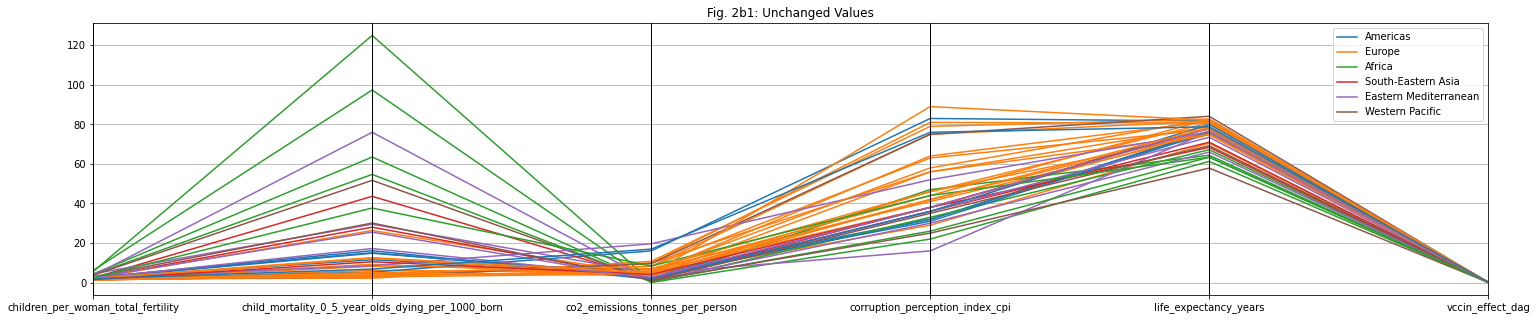

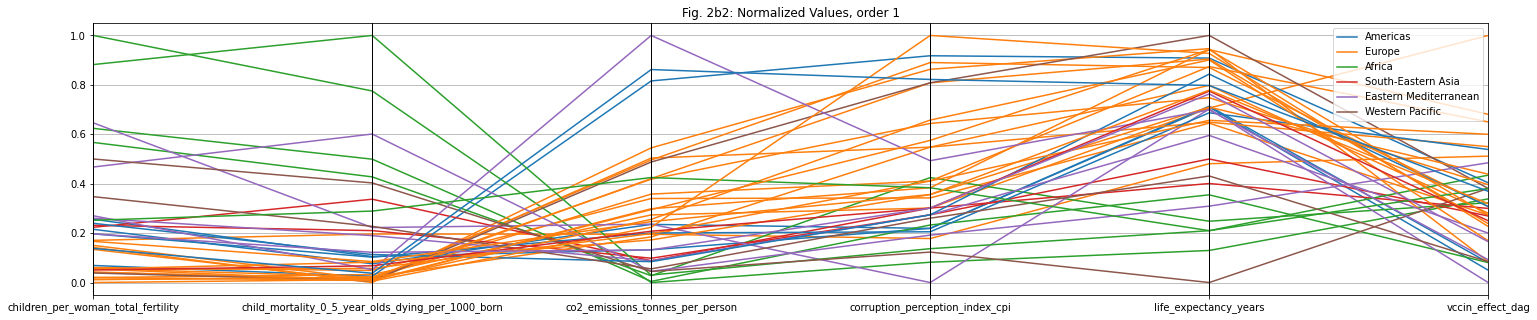

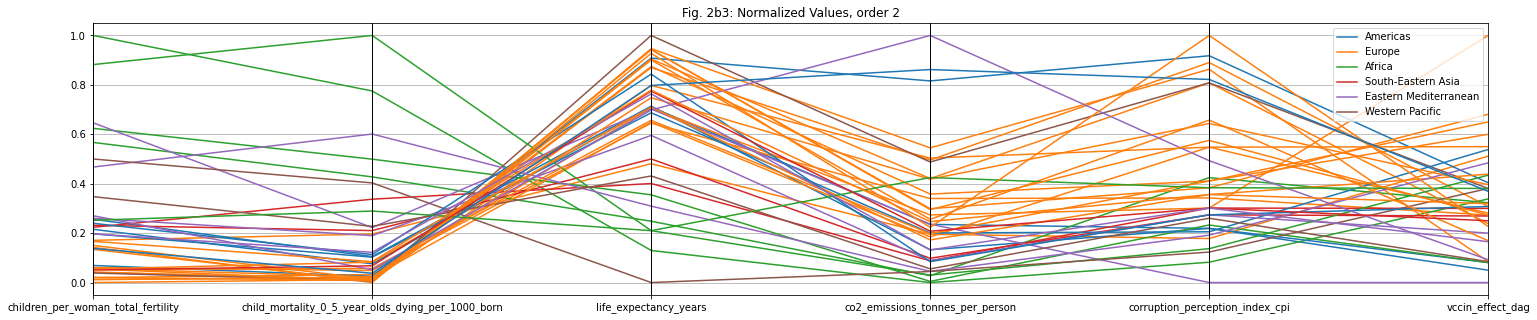

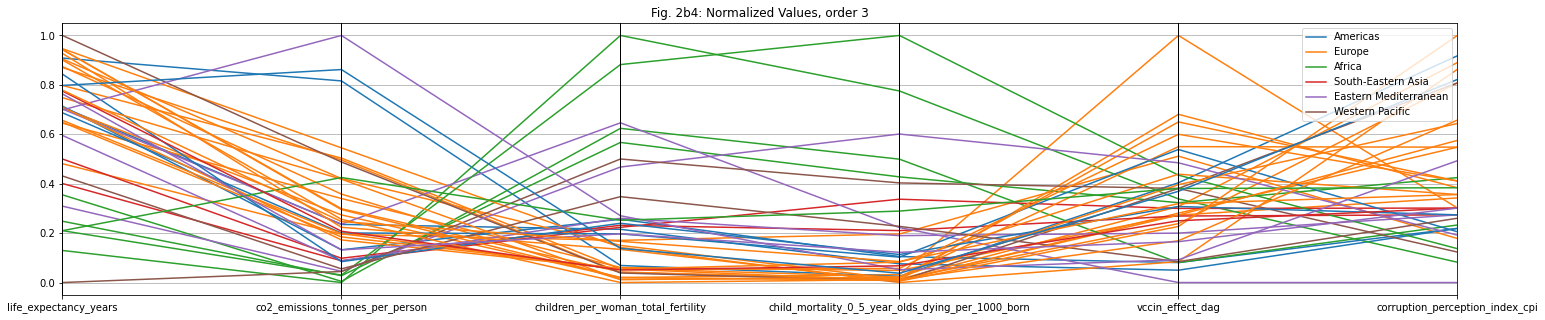

In [419]:
# your code
data_q2_dropped = data_q2.drop(["country"], axis=1)

# plot 1: unchanged values
plt.figure(figsize=(25,5))
pd.plotting.parallel_coordinates(data_q2_dropped, "geographic_group", color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'))
plt.title("Fig. 2b1: Unchanged Values")
# Normalize data. 
cols_norm = data_q2_dropped.columns[1:]
data_q2_dropped[cols_norm] = data_q2_dropped[cols_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
# plot 2: normalized, randomized.
plt.figure(figsize=(25,5))
pd.plotting.parallel_coordinates(data_q2_dropped, "geographic_group", color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'))
plt.title("Fig. 2b2: Normalized Values, order 1")
print(data_q2_dropped.columns)
# plot 3: normalized, ordered.
plt.figure(figsize=(25,5))
pd.plotting.parallel_coordinates(data_q2_dropped, "geographic_group", color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'), cols = ['children_per_woman_total_fertility',
       'child_mortality_0_5_year_olds_dying_per_1000_born',
       'life_expectancy_years', 'co2_emissions_tonnes_per_person', 'corruption_perception_index_cpi','vccin_effect_dag'])
plt.title("Fig. 2b3: Normalized Values, order 2")
# plot 4: normalized, ordered.
plt.figure(figsize=(25,5))
pd.plotting.parallel_coordinates(data_q2_dropped, "geographic_group", color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'), cols = ['life_expectancy_years', 'co2_emissions_tonnes_per_person', 'children_per_woman_total_fertility',
       'child_mortality_0_5_year_olds_dying_per_1000_born', 'vccin_effect_dag', 'corruption_perception_index_cpi',])
plt.title("Fig. 2b4: Normalized Values, order 3")


(c) For each of the questions 1-3 below:
- Indicate all of your parallel coordinate plots, which are suitable for finding an answer to the question. Explain your selection. 
- If possible, briefly answer the questions.

    1) Is there a correlation between fertility and CO2 emissions? If yes, is it positive or negative?

    2) Is there a correlation between life expectancy and vaccination confidence? If yes, is it positive or negative?

    3) Is there a correlation between CO2 emissions and perceived corruption? If yes, is it positive or negative?

Explanation: 
1) In Fig. 2b4, the parallel coordinates map from co2 emissions and fertility show a relatively negative correlation. Higher CO2 emissions correlate to lower fertility and vice versa. It is telling because of the criss-cross pattern between the two features for all entries.

2) In Fig. 2b2, the parallel coordinates map from life expectancy and vaccination confidence show a relatively negative correlation. The higher the life expentancy, the lower the confidence in vaccines. The criss-cross pattern is not as well pronounced as for the relationship between fertility and co2 emissions. 

3) In Fig. 2b3, there is a relatively positive correlation between co2 emissions and perceived corruption. The lines are relatively straight for most entries, indicating that low co2 emissions correspond to low perceived corruption.

(d) In this subtask we prepare the data for the heat map, which we create in subtask (e). 

The heat map should visualize the vaccination confidence ('vccin_effect_dag') for different combinations of CO2 emissions ('co2_emissions_tonnes_per_person') and fertility ('children_per_woman_total_fertility'). The heatmap should have 40 columns and 40 rows. The shown vaccination confidence value should be the *median* of all values for each combination of CO2 emissions and fertility. 

Do the following steps in preparation:

    1) First, drop all columns that are not needed in this task.

    2) Discretize the CO2 emissions and fertility data into 40 bins each, using equal-width binning.

    3) Group the data by CO2 emissions and fertility, using median to aggregate the values.

In [420]:
# your code
# drop unnecessary columns
cols = ["co2_emissions_tonnes_per_person","children_per_woman_total_fertility",'vccin_effect_dag']
data_q2_heat = data_q2.drop(columns=[col for col in data_q2_dropped if col not in cols])
# discretize
pd.cut(data_q2_heat["co2_emissions_tonnes_per_person"], bins=40)
pd.cut(data_q2_heat["children_per_woman_total_fertility"], bins=40)
# group
data_q2_heat_grouped = data_q2_heat.groupby(["co2_emissions_tonnes_per_person","children_per_woman_total_fertility"]).median()

(e) Use the modified data to create a heat map as specified in part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) Which combination of bins results in the highest vaccination confidence? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Can you identify any pattern in the heat map, e.g. in the coloring or in the distribution of empty fields? What can be a possible reason for this?

Text(0.5, 1.0, 'Heatmap CO2 vs. Fertility')

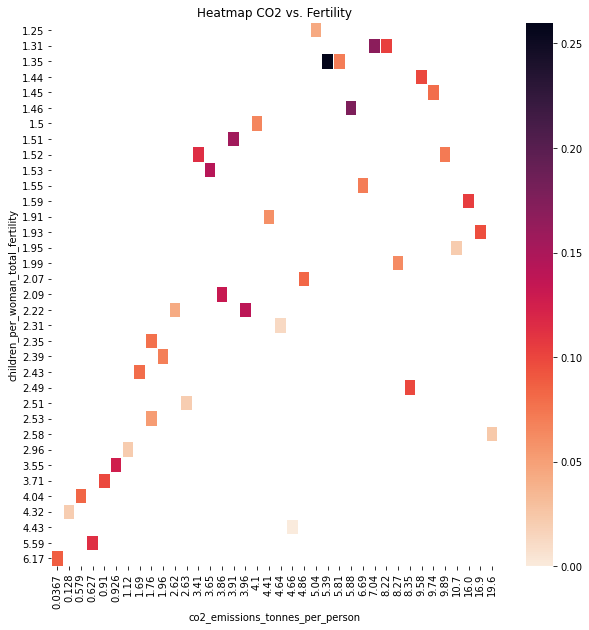

In [421]:
# your code
import seaborn as sns
data_pivot = pd.pivot_table(data_q2_heat_grouped, values = 'vccin_effect_dag', columns="co2_emissions_tonnes_per_person", index ="children_per_woman_total_fertility" )
plt.figure(figsize=(10,10))
sns.heatmap(data_pivot, cmap="rocket_r", linewidth=0.2)
plt.title("Heatmap CO2 vs. Fertility")

Explanation: 

1) The highest vaccine confidence is shown for fairly low fertility (~1.35) and a relatively medium level of co2 emissions (~5.39). Lower fertility seem to correspond to higher confidence in vaccines more so than lower co2 emissions.

2) The empty fields in the heatmap simply indicate that there is no combination of the specific fertility rate and co2 emissions in the dataset.

3) There is a relatively inverse relationship between fertility and co2 emissions, judging from the existing colored bins. There are hardly any countries that have both high fertility and co2 emissions that reported a vaccine confidence score. Neither are there any countries with lower fertility rate and co2 emissions that reported any vaccine confidence scores. With more data, this could be proven wrong, but with the dataset given, there seems to be a pattern.

## Question 3 - Frequent Item Sets and Association Rules (15 points)

(a) Carry out some preprocessing steps before starting the analysis:
 - Select 90% of the <b>store_data</b> dataset by random sampling. Use the matriculation number of one of the group members as seed.
 - After completing this preprocessing step, export your final dataset as <b>store_data_2.csv</b> dataset and use it for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [422]:
# your code
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule
import csv
import random

random.seed(391683)
#rawdata = pd.read_csv('Datasets/store_data.csv')
# Generate sampled_data dataframe based on random sampling of df, based on sampling size k which is the rounded up (ceiling) of the length (shape[0]) of the original dataframe, df. 

store_list = []
with open("Datasets/store_data.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        store_list.append(row)

store_data =pd.DataFrame(data=store_list)

random_rows = np.random.rand(len(store_list)) < 0.9 # seed is already initialized in the beginning.
store_data_sampled = store_data[random_rows]

In [423]:
store_data_sampled.to_csv("Datasets/store_data_sampled.csv",na_rep="",header=None,index=None)

(b) Find the most frequent itemsets with the support of more than 0.04 using the Apriori algorithm.

In [424]:
store_data_sampled = []
with open("Datasets/store_data.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        store_data_sampled.append(row)

In [425]:
### transfer from the store_data_NewList to pd.DataFrame
te = TransactionEncoder()
te_ary = te.fit(store_data_sampled).transform(store_data_sampled)
data = pd.DataFrame(te_ary, columns = te.columns_)

frequent_itemsets = apriori(data, min_support = 0.04, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


(c) Find the most frequent itemsets with more than 1 member and a support of more than 0.04 using the Apriori algorithm.

In [426]:
# learn to use TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length']>1]

,support,itemsets,length
30,0.052660,"(mineral water, chocolate)",2
31,0.050927,"(mineral water, eggs)",2
32,0.040928,"(ground beef, mineral water)",2
33,0.047994,"(mineral water, milk)",2
34,0.059725,"(mineral water, spaghetti)",2


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence, and lift of the filtered rules in one table. How do you interpret the quality of the discovered rules?

In [427]:
# your code
rules_association = arule(frequent_itemsets, metric = 'lift', min_threshold = 1.2)
rules_association = rules_association[rules_association['confidence']>0.3]
rules_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


Explanation:
According to our min_confidence(0.3), min_support(0.04) and min_lift(1.2), we can conclude these 4 rules to be our desired association rules, that means we find its more likely people buy chocolate, milk, spaghetti, or ground beef will also buy mineral water. 

This can also be proven by comparing the antecedent support, consequent support,and total support. If the two products are not associated, then the total support should be multiply of antecedent support, consequent support. But the support is actually higher than the multiplication, which indicates the rule we mentioned before.

(e) Apply the FP-Growth algorithm for all the settings of b, c, and d.

In [428]:
# for settings b
from mlxtend.frequent_patterns import fpgrowth
te = TransactionEncoder()
te_ary = te.fit(store_data_sampled).transform(store_data_sampled)
data = pd.DataFrame(te_ary, columns = te.columns_)


frequent_itemsets = fpgrowth(data, min_support = 0.04, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.132116,(green tea),1
2,0.076523,(low fat yogurt),1
3,0.071457,(shrimp),1
4,0.065858,(olive oil),1
5,0.063325,(frozen smoothie),1
6,0.047460,(honey),1
7,0.042528,(salmon),1
8,0.179709,(eggs),1
9,0.087188,(burgers),1


In [429]:
# fp-growth for setting c
frequent_itemsets = fpgrowth(data, min_support = 0.04, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length']>1]

,support,itemsets,length
30,0.050927,"(mineral water, eggs)",2
31,0.047994,"(mineral water, milk)",2
32,0.059725,"(mineral water, spaghetti)",2
33,0.052660,"(mineral water, chocolate)",2
34,0.040928,"(ground beef, mineral water)",2


In [430]:
# fp-growth for setting d
frequent_itemsets = fpgrowth(data, min_support = 0.04, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length']>1]

rules_association = arule(frequent_itemsets, metric = 'lift', min_threshold = 1.2)
rules_association = rules_association[rules_association['confidence']>0.3]
rules_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
6,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


## Question 4 - Text Mining (15 points): 

In this question, we use <b>sms_data.csv</b>. 

In [431]:
# your imports
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

a) Load the dataset and create the <b>sampled_data</b> dataset which includes 90% of the data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. Split the sampled data into training (80%) and test (20%) data preserving the distribution based on "Label".

<font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [432]:
# your code
import math
import numpy as np
data_q4 = pd.read_csv("Datasets/sms_data.csv", encoding = "ISO-8859-1", delimiter=";")

# Set seed with student ID of Hyeon Su Gim.
random.seed(403364)

# Generate sampled_data dataframe based on random sampling of data_q4, based on sampling size k which is the rounded up (ceiling) of the length (shape[0]) of the original dataframe, data_q4. 
sampled_data = data_q4[data_q4.index.isin(random.sample(range(len(data_q4)),k=math.ceil(0.9*len(data_q4))))]
sampled_data.name = 'sampled_data'

# Export sample_data to a csv of the same name in the same directory.
sampled_data.to_csv("Datasets/sampled_data.csv", index=False)
sampled_data.index = range(len(sampled_data))
# create training and testing vars
y = sampled_data.Label # define the target variable

# split data and preserving distribution at the same time
X_train, X_test, y_train, y_test = train_test_split(sampled_data,y, stratify = y, test_size=0.2)

In [433]:
### use this index to get values
import pandas as pd
sampled_data = pd.read_csv("Datasets/sampled_data.csv")
test_index = X_test.index
train_index = X_train.index

### Classification

In the following tasks, train each of the specified models with the training data and give for each the accuracy on the training data.

(b) Model based on the binary document-term matrix

Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal) and obtain a binary document-term matrix. Train a logistic classifier with the 'Label' as target feature.

In [434]:
# your code
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
encoder = LabelEncoder()

X_train_p = X_train.copy()
X_test_p = X_test.copy()
y_train_p = encoder.fit_transform(np.array(y_train))
y_test_p = encoder.fit_transform(np.array(y_test))

def prep(text):
    text = str(text)
    text = text.lower() # lowercase
    tokenizer = RegexpTokenizer(r'\w+') # remove puntuation
    tokens = tokenizer.tokenize(text) # tokenization
    stem_words = [stemmer.stem(w) for w in tokens] # stemming
    filtered_words = [w for w in stem_words if len(w) > 2 if not w in stopwords.words('english')] # stopword removal
    return filtered_words

X_train_p.Text = [prep(x) for x in X_train_p.Text]
## combine the words of the row into one single string
X_train_p.Text = [' '.join(x) for x in X_train_p.Text]

sampled_data_p = sampled_data.copy()
sampled_data_p.Text = [prep(x) for x in sampled_data_p.Text]
sampled_data_p.Text = [' '.join(x) for x in sampled_data_p.Text]


In [435]:
# first create vocabulary from all dataset
bigram_converter = CountVectorizer() 
allFeatures = bigram_converter.fit_transform(sampled_data_p.Text)
allFeatures_Vocabulary = bigram_converter.get_feature_names()

# using the vocabulary to train CountVectorizer
bigram_converter = CountVectorizer(ngram_range=[1,1],vocabulary=allFeatures_Vocabulary) 
trainFeatures = bigram_converter.fit_transform(X_train_p.Text)

#train the model
logClassifier = LogisticRegression()
logModel = logClassifier.fit(trainFeatures, X_train_p.Label)
# testFeatures = bigram_converter.fit_transform(X_test_p.Text).toarray()
# print(testFeatures.shape)
# print(y_test_p.shape)
# y_pred = logModel.predict(testFeatures)

In [436]:
#### predicting part, this cell can be used in d later
testFeatures = bigram_converter.fit_transform(X_test_p.Text).toarray()
y_pred = logModel.predict(testFeatures)
logModel.score(testFeatures,y_test)

0.9531405782652044

!!!!!!!!!!!!!
Here the number of columns of testset is different from training set, which makes it impossible to predict. So we need to firstly transfer whole data set to matrix, and then select 80% of them to be training data.



(c) Model based on doc2vec

- Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal). 
- Obtain a doc2vec embedding in order to reduce the dimension of the document vector. Explain which vector size you use and why.
- Use the doc2vec model you just trained to convert the training set to a set of document vectors.
- Train a logistic classifier with 'Label' as target feature.

In [437]:
# your code
import multiprocessing
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
cores = multiprocessing.cpu_count()

## create Tagged Document
def Get_Tagged_Document(sampled_data_p):
    x_document = []
    #print(sampled_data_p.Label[sampled_data_p.index[0]])
    for i,text in enumerate(sampled_data_p.Text):
        word_list = text.split(' ')
        l = len(word_list)
        word_list[l-1] = word_list[l-1].strip()
        document = TaggedDocument(word_list,[sampled_data_p.Label[sampled_data_p.index[i]]])
        x_document.append(document)
    return x_document

train_tagged = Get_Tagged_Document(X_train_p)
test_tagged = Get_Tagged_Document(X_test_p)

In [438]:
# creating vocabulary
doc2vec_model = Doc2Vec(dm=0, vector_size=200, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(train_tagged)])

100%|██████████████████████████████████████████████████████████████████████████████████████| 4012/4012 [00:00<?, ?it/s]


In [439]:
# Training the doc2vec model
from sklearn import utils
doc2vec_model.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=100)
# for epoch in range(100):
#     doc2vec_model.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
#     doc2vec_model.alpha -= 0.002
#     doc2vec_model.min_alpha = doc2vec_model.alpha

100%|██████████████████████████████████████████████████████████████████████████████████████| 4012/4012 [00:00<?, ?it/s]


In [440]:
# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets

# Translating docs into vectors for training and test set
X_train_Vec, y_train_Tag = vec_for_learning(doc2vec_model, train_tagged)
X_test_Vec, y_test_Tag = vec_for_learning(doc2vec_model, test_tagged)

In [441]:
# Training a classification model
from sklearn.linear_model import LogisticRegression

log_reg_Doc2Vec = LogisticRegression(n_jobs=cores, C=1e5)
log_reg_Doc2Vec.fit(X_train_Vec, y_train_Tag)


LogisticRegression(C=100000.0, n_jobs=4)

### Evaluation
For the following tasks, use the test data.

(d) Predict the classification with the two models on the test data. Preprocess the data if necessary.

In [442]:
# your code
#### predicting part for document-term matrix
testFeatures = bigram_converter.fit_transform(X_test_p.Text).toarray()
y_pred = logModel.predict(testFeatures)
logModel.score(testFeatures,y_test)

#### predicting part for Doc2Vec
y_pred_Doc2Vec = log_reg_Doc2Vec.predict(X_test_Vec)

Explanation:



(e) Obtain the confusion matrices for the two models and the prediction on the test data.

In [443]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix for binary document-term matrix model:')
print(confusion_matrix(y_test, y_pred))

print('confusion_matrix for Doc2Vec model:')
print(confusion_matrix(y_test_Tag, y_pred_Doc2Vec))

confusion_matrix for binary document-term matrix model:
[[867   0]
 [ 47  89]]
confusion_matrix for Doc2Vec model:
[[856  11]
 [ 56  80]]


(f) Obtain accuracy and F1-score for the prediction of the two different models on the test data.

In [444]:
# your code
# Classification performance metrics for two models
from sklearn.metrics import accuracy_score, f1_score

print('For the binary document-term matrix model:')
print('Test accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

print('For the Doc2Vec model:')
print('Test accuracy %s' % accuracy_score(y_test_Tag, y_pred_Doc2Vec))
print('Test F1 score: {}'.format(f1_score(y_test_Tag, y_pred_Doc2Vec, average='weighted')))

For the binary document-term matrix model:
Test accuracy 0.9531405782652044
Test F1 score: 0.9488646743032491
For the Doc2Vec model:
Test accuracy 0.9332003988035892
Test F1 score: 0.9274241445752853


(g) Briefly comment on the quality of the two models. Interpret the results retrieved in the evaluation part.

Explanation: 

We see binary document-term matrix has a slightly higher accuracy and F1 score. But maybe there are different parameters we could use to make Doc2Vec better.

### Language model

For the following tasks use the <b>sampled_data</b>.

(h) Create two lists, one for ham and one for spam, containing all messages.
For ham and spam separately, build a bigram language model using the initial dataset (before splitting to training and test data). Do not perform stemming nor stopword removal for this task, but apply other preprocessing steps, such as all to lowercase, no punctuation and tokenization. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [445]:
# your code
import pandas as pd
sampled_data = pd.read_csv("Datasets/sampled_data.csv")

# preprocessing
def prep_2(text):
    text = str(text)
    text = text.lower() # lowercase
    tokenizer = RegexpTokenizer(r'\w+') # remove puntuation
    tokens = tokenizer.tokenize(text) # tokenization
    return tokens

sampled_data.Text = [prep_2(i) for i in sampled_data.Text]
#sampled_data.Text = [' '.join(x) for x in sampled_data.Text]
Ham_data = sampled_data[sampled_data['Label']=='ham']
Spam_data = sampled_data[sampled_data['Label']=='spam']

In [446]:
sampled_data.Text = [' '.join(x) for x in sampled_data.Text]
bigram_converter = CountVectorizer() 
allFeatures = bigram_converter.fit_transform(sampled_data.Text)
allFeatures_Vocabulary = bigram_converter.get_feature_names()

In [447]:
from nltk import bigrams

Bigram_spam_tuple = []
for spam in Spam_data.Text:
    B = bigrams(spam,pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
    for grams in B:
        Bigram_spam_tuple.append(grams)
        
Bigram_ham_tuple = []
for ham in Ham_data.Text:
    B = bigrams(ham,pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
    for grams in B:
        Bigram_ham_tuple.append(grams)

In [448]:
import numpy as np
all_vocabulary = list(np.unique(Bigram_spam_tuple+Bigram_ham_tuple))
len(all_vocabulary)

8260

(i) For each message groups, use the correspondent language model from (h) to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [532]:
from nltk.lm import MLE
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline

### train bigram for the spam message

paddedLine_spam = []

for text in Spam_data.Text:
    x = list(pad_both_ends(text, n=2))
    paddedLine_spam.append(x)
    
    
train, vocab = padded_everygram_pipeline(2, paddedLine_spam)

lm_spam = MLE(2)
lm_spam.fit(train,vocab)


### train bigram for ham data
paddedLine_ham = []

for text in Ham_data.Text:
    x = list(pad_both_ends(text, n=2))
    paddedLine_ham.append(x)
    
    
train, vocab = padded_everygram_pipeline(2, paddedLine_ham)

lm_ham = MLE(2)
lm_ham.fit(train,vocab)

In [530]:
print('Generate for ham message:')
print(lm_ham.generate(15,text_seed=['hello']))
print(lm_ham.generate(15,text_seed=['yes']))
print(lm_ham.generate(15,text_seed=['but']))

Generate for ham message:
['it', 'just', 'looked', 'it', 'to', 'meet', 'you', 'get', 'a', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
['on', 'phone', 'that', 's', 'kallis', 'home', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
['de', 'but', 'a', 'completely', 'stop', 'that', 's', 'busy', 'in', 'dismay', 'many', 'happy', 'to', 'come', 'down']


In [531]:
print('Generate for spam message:')
print(lm_spam.generate(15,text_seed=['hello']))
print(lm_spam.generate(15,text_seed=['yes']))
print(lm_spam.generate(15,text_seed=['but']))

Generate for spam message:
['from', '1', '50', 'should', 'your', 'girl', 'in', '2', 'claim', 'code', '7684', 'standard', 'rates', 'apply', 'ag']
['to', '84025', 'now', 'and', 'send', '1', 'nokia', 'to', '87066', 'tnc', '</s>', '</s>', '</s>', '</s>', '</s>']
['u', 'teletext', 'pg', '750', 'anytime', 'any', 'networks', 'mins', '100', 'weekly', 'comp', 'just', '5', 'per', 'min']


(j) Build a trigram model with the same data as in the previous task. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [452]:
from nltk import trigrams

Trigram_spam_tuple = []
for spam in Spam_data.Text:
    B = trigrams(spam,pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
    for grams in B:
        Trigram_spam_tuple.append(grams)
        
Trigram_ham_tuple = []
for ham in Ham_data.Text:
    B = trigrams(ham,pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
    for grams in B:
        Trigram_ham_tuple.append(grams)

In [591]:
### train trigram for spam data
paddedLine_spam = []

for text in Spam_data.Text:
    x = list(pad_both_ends(text, n=1))
    paddedLine_spam.append(x)
    
    
train, vocab = padded_everygram_pipeline(3, paddedLine_spam)

lm_spam = MLE(3)
lm_spam.fit(train,vocab)


### train bigram for ham data
paddedLine_ham = []

for text in Ham_data.Text:
    x = list(pad_both_ends(text, n=1))
    paddedLine_ham.append(x)
    
    
train, vocab = padded_everygram_pipeline(3, paddedLine_ham)

lm_ham = MLE(3)
lm_ham.fit(train,vocab)

In [ ]:
train, vocab = padded_everygram_pipeline(3, paddedLine_ham)
for i in train:
    print(list(i))

(k) For each message group (ham and spam), use the correspondent language model from the previous qustion to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [596]:
# your code
print('Generate for ham message:')
print(lm_ham_tri.generate(15,text_seed='hello'))
print(lm_ham_tri.generate(15,text_seed='yes'))
print(lm_ham_tri.generate(15,text_seed='but'))

print('Generate for spam message:')
print(lm_spam_tri.generate(15,text_seed='hello'))
print(lm_spam_tri.generate(15,text_seed='yes'))
print(lm_spam_tri.generate(15,text_seed='but'))

Generate for ham message:
['that', 'would', 'be', 'much', 'simpler', 'but', 'then', 'they', 'woke', 'up', 'before', 'class', 'will', 'try', 'later']
['question', 'some', 'hours', 'before', 'its', 'answer', '<UNK>', '<UNK>', '<UNK>', 'there', 'is', 'like', 'sachin', 'just', 'standing']
['<UNK>', 'good', 'good', 'billy', 'mates', 'all', 'gone', 'now', 'speak', 'soon', '<UNK>', '<UNK>', 'my', 'little', 'party']
Generate for spam message:
['urgent', 'your', 'mobile', '11mths', 'you', 'are', 'entitled', 'to', '3750', 'pounds', 'for', 'the', 'most', 'sparkling', 'shopping']
['<UNK>', 'points', 'call', '08715203656', 'identifier', 'code', '40533', 'expires', '31', '10', '04', '<UNK>', '<UNK>', 'free', 'call']
['free', 'entry', 'in', '<UNK>', '<UNK>', 'me', '2nite', '<UNK>', 'some', 'sexy', 'passion', 'b4', '<UNK>', 'have', 'one']


(l) Compare the quality of the generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation: 
For the quality, we can easily find out the trigrams give us a better prediction result because we implicitly have more trained combination and thus can handle more complex sentence. While for bigram cases only the current word will determine the next word so the sentence become weird.

However if we look at the trigram prediction, there are more '<unk>' words, indicating the model doesn't know the word because we meet an unfamiliar combination which result from trigrams, so this can also reduce the accuracy. But if we look at the words part and ignore the '<unk>', trigram still gives a better prediction.

## Question 5 - Process Mining (15 points): 

### General investigation

a) Import the event log from the <b>Quarantine_Log</b> csv file. Set the case ID to 'patient', Timestamp to 'timestamp' and Activity as 'activity'. Also, set the lifecyle column to the right attribute. Furthermore, identify the case attributes and set them to case attributes. Find the correct setting, so that the resource is understood as resource (compare with the documentation). Give some basic information:

    - number of cases
    - number of variants
    - number of events
    - the trace and event attribute names
    - the number of resources
    - the earliest timestamp and the latest timestamp

In [ ]:
# your code
import pm4py
from pm4py.objects.log.importer.xes import factory as xes_importer
Quarantine_Log = xes_importer.import_log('roadtraffic50traces.xes')

### Sampling the event log
(b) Create a sample of the event log (<b>log_sampled</b>) containing 80% of the traces. Export the sampled event log.

<font color='red'>Important!</font> Make sure that you submit your extracted event log with your results in Moodle.

In [ ]:
# your code

### Trace frequency
(c) Use the sampled event log and print the least frequent and the most frequent variant and the corresponding counts. Is there already some indication about the model structure (e.g. loops, parallel, etc.)?

In [ ]:
# your code

Explanation: 

### Filter event logs
(d) Create three different event logs:

1. One event log containing only the 10% of the most frequent traces (**filtered_log_variants**).
2. One event log containing only patients with private insurance (**filtered_log_insurance**).
3. One event log containing only patients having the event attribute type as 'cloud' (**filtered_log_cloud**).

In [ ]:
# your code

### Discovery and conformance checking

(e) Use the Inductive Miner to discover a process model (Process tree or Petri net) for each event log created in (d). For one of the models - you may choose - explain shortly the behaviour of the model. (e.g. loops, sequences)

In [ ]:
# your code

Explanation:

(f) Briefly summarize the differences and similarities of the models. Why do they differ/are similar?

Explanation: 


(g) Perform the token-based replay for conformance checking using your discovered model for **filtered_log_variants** and the original event log. Does your process model fit the log? Explain the result in one sentence. Calculate the trace and log fitness.

In [ ]:
# your code

Explanation: The model has a low fitness, because of the low number of traces used to create the model.

### Frequency and performance

(h) Visualize the model for the **filtered_log_variants** event log enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

In [ ]:
# your code

(i) What are frequent activities? Why may they be frequent (think about the real life process described by the log)? What are possibly problematic activities according to the performance?

Explanation: 

## Question 6 - Big Data (15 points): 

### Preparation: generating a simple log

In this question, we use the event log from the log csv file with the following modifications:
1. We flatten the lifecycles (i.e., start and complete) into a single event. Each event contains the start timestamp and complete timestamp.
2. A new column, called ServiceTime column, is included which represents the duration of the corresponding activity in the event.

We name the event log as **simple_log** in the remainder. Please follow the explanations below to prepare the **simple_log**. The preparation steps will not be graded.

In [ ]:
# We use following utility functions for the modifications (these are given):
def _distinguish_duplicate_activities(log):
    """Add flags to the duplicate activities in a trace in order to distinguish them

    Keyword arguments:
    log -- even log
    """
    trace = list()
    activity_list = list()
    count=0
    prev_caseid=""
    for row in log.itertuples():
        activity=row.Activity
        caseid=row.Patient
        if(caseid!=prev_caseid):
            count=0
            prev_caseid=caseid
            trace=[]

        if activity in trace:
            count+=1
            activity = activity + "-{}".format(count)
            
        trace.append(activity)
        activity_list.append(activity)
    log["Activity"] = activity_list
    return log

def _merge_lifecylces(log):
    """Merge lifycycles (start,complete) into a single event. 

    Keyword arguments:
    log -- even log
    """
    start_log = log.loc[log["Lifecycle"]=="start"]
    start_log = _distinguish_duplicate_activities(start_log)
    
    complete_log = log.loc[log["Lifecycle"]=="complete"]
    complete_log = _distinguish_duplicate_activities(complete_log)

    complete_log["CompleteTime"] = complete_log["ModelTime"]
    simple_log = start_log.merge(complete_log, left_on=['Patient',"Activity"], right_on=['Patient',"Activity"],suffixes=("", "_y"))
    simple_log.drop(simple_log.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
    simple_log["ServiceTime"] = simple_log["CompleteTime"] - simple_log["ModelTime"]
    return simple_log

def produce_simple_log(filepath):
    """Produce simple log where the lifecycles are merged and service time information is added

    Keyword arguments:
    filepath -- path to event log
    """
    log = pd.read_csv(filepath, sep=',')
    log.sort_values(by=["Patient","ModelTime"],inplace=True)
    simple_log = _merge_lifecylces(log)
    return simple_log

**Preparation step 1**: Replace the filepath to your own filepath to produce the **simple_log**.  

In [ ]:
import pandas as pd
#your filepath
filepath = "./Datasets/Quarantine_log.csv"
simple_log = produce_simple_log(filepath)

### Preparation: expanding the event log

In this question, we generate 100 event logs based on the <b>simple_log</b>. Each log replicates the base log (i.e., the <b>simple_log</b>). For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [ ]:
# We use following utility functions for the modifications (these are given):
import random
def _randomize_case_attribute(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    random.seed(matriculation_num)
    caseids = set(log["Patient"])
    for caseid in caseids:
        random_val = random.randint(-3,3)
        random.seed(random_val)
        log.loc[log["Patient"]==caseid,"Age"] = log.loc[log["Patient"]==caseid,"Age"]+random_val
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    import os
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    base_log = original_log.copy(deep=True)
    max_modeltime = max(base_log["ModelTime"])
    max_patientid = max(base_log["Patient"])
    for i in range(num_replication):
        generated_log = base_log
        generated_log["Patient"] += max_patientid
        generated_log["ModelTime"] += max_modeltime
        random.seed(None)
        randomized_log = _randomize_case_attribute(generated_log,random.randint(0,mat_num))
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))
        base_log = randomized_log

**Preparation step 2**: Generate 100 replicated logs in your local disk (./generated-logs/generated-log-0.tsv, ./generated-logs/generated-log-1.tsv, ..., ./generated-logs/generated-log-99.tsv). Do not forget to replace the SUM_MAT_NUM to yours.

In [ ]:
#your group's sum
SUM_MAT_NUM = 403364+391683 
base_log = simple_log[["Patient", "ModelTime","Activity","Age","ServiceTime"]] # this will be removed
NUM_REPITITION=100
generate_log(base_log,NUM_REPITITION,SUM_MAT_NUM)

### Basic Hadoop

(a) Now, it's time to work with the Hadoop system. The goal of this task is to merge 100 event logs at your disk in the Hadoop system. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Alessandro Berti", "Bernardo Silva", "Chiao Li", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the files to the running Hadoop system (at /input/(identifier)-generated-logs/). 
    3) Merge the file and copy the result back to the Hadoop system (at /input/(identifier)-final-log.tsv).
    4) Using the Hadoop command, print out the merged file in the command line (the screenshot may contain 10 rows).

In [ ]:
#your code
from IPython.display import Image
Image(filename='./screenshots/6a_1.jpg') 

In [ ]:
#your code
Image(filename='./screenshots/6a_2.jpg')

In [ ]:
#your code
Image(filename='./screenshots/6a_3.jpg') 
### here I missunderstood the letter classifier at first, so I firstly created a folder and final log with wrong names
### then I created a correct version

In [ ]:
#your code
Image(filename='./screenshots/6a_4.jpg') 
## because there are too many datas I can only show some of them

### Process Discovery

(b) Discover a process model from the merged file using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Jupyter notebook code that prints the directly-follows relations and discover process models based on the directly-follows relations (you are free to use any discovery algorithms)

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

Explaination of the model discovery:

To find the process model, the aim is to find directly-follows relations. If we can have directly-follows relations, 
we can discover process model. But to find DFR, we should firstly find the event traces from event log file. 

1. Find the event traces:

Firstly the mapper1.py file analyse each row of the event log, and create a <'case'-'timestamp','activity'> set. In our question, case is patient number,timestamp is the model time. Like the results shown below:

<font color='r10b10g1'>Result of Mapper1</font>:

1-0	Register

1-642	Initial Exam

1-1743	Initial Exam Decision

1-2159	Inform about Isolation

Then the reducer1.py function make a list of all the activities from the same patient, like the results below:


<font color='r10b10g1'>Result of Reducer1</font>:

1	["Register", "Initial Exam", "Initial Exam Decision", "Inform about Isolation"]


1500	["Register", "Initial Exam", "Initial Exam Decision", "Discharge Init Exam"]

2. Find the directly-follows relations:

With the result of the activity list with the patient number, we can now easily split each activity list into bigrams in the mapper2.py function and then count the bigram in the reducer2.py function:

<font color='r10b10g1'>Result of Mapper2</font>:

Register,Initial Exam	1

Initial Exam,Initial Exam Decision	1

Initial Exam Decision,Inform about Isolation	1

Register,Initial Exam	1

Initial Exam,Initial Exam Decision	1

Initial Exam Decision,Discharge Init Exam	1


<font color='r10b10g1'>Result of Reducer2</font>:

Initial Exam Decision,Discharge Init Exam	1

Initial Exam Decision,Inform about Isolation	1

Initial Exam,Initial Exam Decision	2

Register,Initial Exam	2

In [ ]:
# Having the output of Reducer2 function, the data can be input in step 4 and we can generate DFG and Workflow-Net
import os
import csv
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.objects.conversion.dfg import factory as dfg_mining_factory
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory

# 2. preprocessing
with open('./MapReduceOutput/MapReduce_2_DFR.txt') as file:
    file_reader = csv.reader(file, delimiter='\t')
    dfg = dict()
    for row in file_reader:
        _from,_to=row[0].split(',')
        rel = (_from,_to)
        freq = int(row[1])
        dfg[rel] = freq

# 3. Visualize Directly-follows-graph (DFG)
gviz = dfg_vis_factory.apply(dfg)
dfg_vis_factory.view(gviz)
dfg_vis_factory.save(gviz, "./MapReduceOutput/Directly-follows-graph.png")

# 4. Discover and Visualize Workflow-Net
net, im, fm = dfg_mining_factory.apply(dfg)
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)
dfg_vis_factory.save(gviz, "./MapReduceOutput/Workflow-Net.png")


### Performance Analysis

(c) Calculate the total service time for each case using MapReduce algorithms. Explain how you calculate the total service time for each case with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Result: total service times for cases (as text file)
    
Important! Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), 3), and 4) should be submitted as outputs.

Explaination:

To calculate the service time. We only need the 'case' and 'service time' column this time. And the calculation will be only one mapper function and one reducer function. So basically in mapper function, we read the event log file and select the case and service time column, and print the a list <case, service time> pairs. The output datas represent different activity service time of the patients. Then for the pair with the same case ID, which are literally all the service time of the same patient, we will sum up the service time in reducer function.

So the output of mapper looks like below:

1	533

1	1041

1	314

1	314

And the output of reducer looks like this:

1	2202.0


(d) Visualize 1000 cases with the longest total service time using any chart.

In [ ]:
# print the 1000 longest time
stimedata = []

with open('./PerformanceAnalysis//P_analyse.txt') as file:
    file_reader = csv.reader(file, delimiter='\t')
    for case,value in file_reader:
        stimedata.append([int(case),float(value)])

print('The 1000 longest total service time:')
print("{:<10} {:10}".format('Case','Service Time'))
data = sorted(stimedata,key = lambda x:x[1],reverse=True)[:1000]
for i in data:
    print("{:<10} {:10}".format(i[0],i[1]))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[15,10])
df = pd.DataFrame(data=data,columns=['Case_ID','Service_Time'])
sns.jointplot(x="Case_ID", y="Service_Time", data=df)